In [7]:
import requests
from bs4 import BeautifulSoup
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt

# 검색 지역 기온 및 습도

In [8]:
def wheather():
    source = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
    soup = BeautifulSoup(source.content,"html.parser")
    
    table = soup.find('table',{'class':'table_develop3'})
    data = []
    user = input("검색할 지역을 입력해주세요:")

    print("#"*30)
    print("\n===== 지역별 현재 기온과 습도입니다. =====\n")
    print("#"*30)
    
    for tr in table.find_all('tr'):
        tds = list(tr.find_all('td'))
        for td in tds:
            if td.find('a'):
                point = td.find('a').text
                if point == user:
                    temp = tds[5].text
                    humidity = tds[10].text
                    print("{0:<7} {1:<7} {2:<7}".format(point,temp,humidity))
                    data.append([point,temp,humidity])
        
    print("#"*30)
    print("\n===== end =====\n")
    print("#"*30)

wheather()

##############################

===== 지역별 현재 기온과 습도입니다. =====

##############################
대구      8.6     32     
##############################

===== end =====

##############################


In [9]:
def allwheather():
    source = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
    soup = BeautifulSoup(source.content,"html.parser")
    
    table = soup.find('table',{'class':'table_develop3'})
    data = []

    # print("#"*30)
    # print("\n===== 지역별 현재 기온입니다. =====\n")
    # print("#"*30)
    
    for tr in table.find_all('tr'):
        tds = list(tr.find_all('td'))

        for td in tds:
            if td.find('a'):
                point = td.find('a').text
                temp = tds[5].text
                humidity = tds[10].text
                print("{0:<7} {1:<7} {2:<7}".format(point,temp,humidity))
                data.append([point,temp,humidity])
        
    # print("#"*30)
    # print("\n===== end =====\n")
    # print("#"*30)
    return data
#allwheather()

# -지역별 기온 및 습도
# -대도시별 기온 및 습도 그래프

강릉      9.5     40     
강진군     9.7     40     
강화      4.8     47     
거제      9.2     43     
거창      8.7     22     
경주시     10.5    28     
고산      8.0     74     
고창      6.7     36     
고창군     6.8     38     
광양시     9.0     37     
광주      8.5     35     
군산      5.6     47     
금산      8.6     23     
김해시     10.2    27     
남원      8.1     27     
남해      8.5     42     
대관령     3.4     17     
대구      8.6     32     
대전      8.7     21     
동두천     5.5     28     
목포      5.8     43     
문경      6.4     31     
밀양      10.2    22     
백령도     4.2     44     
보령      6.2     43     
보성군     9.4     42     
보은      7.0     19     
봉화      6.8     28     
부산      10.7    49     
부안      6.3     42     
부여      7.0     19     
북창원     9.9     32     
북춘천     5.2     20     
산청      8.7     30     
상주      7.2     28     
서귀포     9.4     70     
서산      6.6     40     
서울      6.8     28     
성산      8.8     69     
세종      6.8     19     
수원      6.4     24     
순창군     8.3     

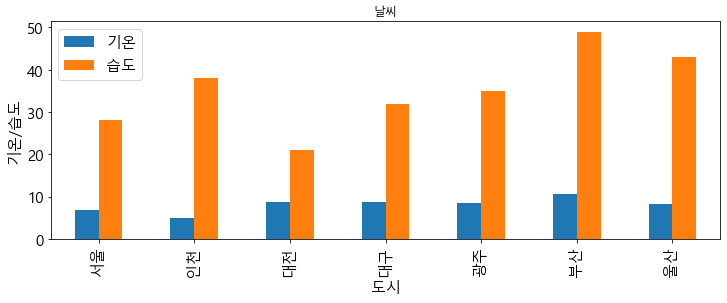

In [10]:
def graph():
    data = allwheather()
    with open('weather.csv','w') as f:
        f.write('지역, 온도, 습도\n')
        for i in data:
            f.write('{0},{1},{2}\n'.format(i[0],i[1],i[2]))
    
    df = pandas.read_csv('weather.csv', index_col='지역' , encoding='utf-8')
    
    city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
    
    font_name = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
    mpl.rc('font',family=font_name)
    
    ax = city_df.plot(kind='bar',title='날씨',figsize=(12,4),legend=True,fontsize=15)
    ax.set_xlabel('도시',fontsize=15)
    ax.set_ylabel('기온/습도',fontsize=15)
    ax.legend(['기온','습도'],fontsize=15)
    
    plt.show()

graph()